In [28]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report

In [29]:
metadata=pd.read_csv("movie_metadata_with_score_metacritic.csv", index_col="Unnamed: 0") #reading in metacritic dataset
metadata=metadata.loc[~metadata["metacritic_metascore"].isna()] #removing rows with no metacritic data
metadata=metadata.drop(["homepage","keywords","overview","status","tagline","imdb_metascore","budget","revenue"],1) #dropping unnecessary features
metadata=metadata.drop_duplicates() #dropping duplicates
metadata["release_year"]=metadata.release_date.str[0:4].astype(int) #creating new column with year for comparison


In [30]:
num_data=pd.read_csv("the_numbers_budget.csv") #reading in revenue data
num_data=num_data.rename(columns={"Movie":"title"}) #renaming column to match metadata
num_data["num_year"]=num_data["Release Date"].str[-4:].astype(int)
num_data=num_data.drop_duplicates()#dropping duplicates

In [31]:
critic_revenue=metadata.merge(num_data,on="title") #merging datasets
critic_revenue=critic_revenue.drop_duplicates() #dropping duplicates
critic_revenue=critic_revenue.loc[(critic_revenue["Worldwide Gross"]!=0)] #removing rows with no revenue data
critic_revenue=critic_revenue.loc[(np.abs(critic_revenue.release_year-critic_revenue.num_year)<5)] #removing rows where the years don't match, as this indicates different movies

critic_revenue["log Worldwide Gross"]=np.log(critic_revenue["Worldwide Gross"])#adding column for log of revenue

In [32]:
critic_revenue_small=critic_revenue.loc[critic_revenue['Production Budget'] <= 40000000]
critic_revenue_small.shape[0]

2379

In [33]:
#Normalizing by the median for merged data set

critic_revenue_small["Production Budget"]=(critic_revenue_small["Production Budget"]-critic_revenue_small["Production Budget"].median())/critic_revenue_small["Production Budget"].std()
critic_revenue_small["Worldwide Gross"]=(critic_revenue_small["Worldwide Gross"]-critic_revenue_small["Worldwide Gross"].median())/critic_revenue_small["Worldwide Gross"].std()
critic_revenue_small["log Worldwide Gross"]=(critic_revenue_small["log Worldwide Gross"]-critic_revenue_small["log Worldwide Gross"].median())/critic_revenue_small["log Worldwide Gross"].std()
critic_revenue_small["Domestic Gross"]=(critic_revenue_small["Domestic Gross"]-critic_revenue_small["Domestic Gross"].median())/critic_revenue_small["Domestic Gross"].std()
critic_revenue_small["popularity"]=(critic_revenue_small["popularity"]-critic_revenue_small["popularity"].median())/critic_revenue_small["popularity"].std()
critic_revenue_small["vote_count"]=(critic_revenue_small["vote_count"]-critic_revenue_small["vote_count"].median())/critic_revenue_small["vote_count"].std()
critic_revenue_small["metacritic_metascore"]=(critic_revenue_small["metacritic_metascore"]-critic_revenue_small["metacritic_metascore"].median())/critic_revenue_small["metacritic_metascore"].std()
critic_revenue_small["runtime"]=(critic_revenue_small["runtime"]-critic_revenue_small["runtime"].median())/critic_revenue_small["runtime"].std()

# Reindex since the dataset has been subset many times
critic_revenue_small.index=range(len(critic_revenue_small))

/Users/tatenda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/tatenda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/tatenda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

In [34]:
critic_revenue_small

,genres,id,original_language,original_title,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,...,vote_average,vote_count,metacritic_metascore,release_year,Release Date,Production Budget,Domestic Gross,Worldwide Gross,num_year,log Worldwide Gross
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",79698,en,The Lovers,-0.559237,"[{""name"": ""Corsan"", ""id"": 7299}, {""name"": ""Bli...","[{""iso_3166_1"": ""AU"", ""name"": ""Australia""}, {""...",2015-02-13,0.369633,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",...,4.8,-0.238204,-1.896911,2015,3/13/2015,1.783537,-0.412489,-0.324116,2015,-3.400324
1,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",9799,en,The Fast and the Furious,-0.312578,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...","[{""iso_3166_1"": ""DE"", ""name"": ""Germany""}, {""is...",2001-06-22,0.211219,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",...,6.6,4.016870,0.158076,2001,6/22/2001,2.038328,3.360258,2.543951,2001,0.968828
2,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 18, ""name...",29193,en,The Spanish Prisoner,-0.522303,"[{""name"": ""Jean Doumanian Productions"", ""id"": ...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1997-09-08,0.422438,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",...,7.1,-0.189309,0.790380,1997,4/3/1998,-0.339721,-0.147191,-0.132116,1998,-0.232567
3,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",9387,en,Conan the Barbarian,1.054487,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1982-04-02,1.425728,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",...,6.6,0.534078,-0.632304,1982,5/14/1982,0.509582,0.586462,0.774535,1982,0.542399
4,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 35, ""nam...",16281,en,Creepshow,0.058192,"[{""name"": ""Warner Bros."", ""id"": 6194}, {""name""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1982-11-12,0.950485,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",...,6.7,0.002507,0.210768,1982,11/10/1982,-0.509582,0.110593,-0.045989,1982,-0.067976
5,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10751, ""...",15189,en,Hotel for Dogs,0.036018,"[{""name"": ""DreamWorks SKG"", ""id"": 27}, {""name""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-01-16,-0.105609,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",...,5.7,-0.027582,-0.210768,2009,1/16/2009,1.783537,1.497965,1.375132,2009,0.736200
6,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",802,en,Lolita,0.623892,"[{""name"": ""Seven Arts Productions"", ""id"": 516}...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",1962-06-13,2.693042,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",...,7.3,0.214383,-0.474228,1962,1/1/1962,-1.019164,-0.171001,-0.195798,1962,-0.411494
7,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",1368,en,First Blood,2.771674,"[{""name"": ""Orion Pictures"", ""id"": 41}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1982-10-22,-0.475243,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",...,7.2,1.584683,0.316152,1982,10/22/1982,0.000000,0.820087,1.414795,1982,0.746454
8,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 9648, ""n...",768,en,From Hell,0.743205,"[{""name"": ""Twentieth Century Fox Film Corporat...","[{""iso_3166_1"": ""CZ"", ""name"": ""Czech Republic""...",2001-10-19,1.056095,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",...,6.6,0.648165,-0.052692,2001,10/19/2001,1.783537,0.412440,0.630067,2001,0.479750
9,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",10895,en,Pinocchio,1.834606,"[{""name"": ""RKO Radio Pictures"", ""id"": 6}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1940-02-23,-0.739266,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",...,6.9,1.417940,-2.318447,1940,2/9/1940,-0.994598,1.788310,0.846561,1940,0.570617


In [35]:
critic_revenue_small.head()

,genres,id,original_language,original_title,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,...,vote_average,vote_count,metacritic_metascore,release_year,Release Date,Production Budget,Domestic Gross,Worldwide Gross,num_year,log Worldwide Gross
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",79698,en,The Lovers,-0.559237,"[{""name"": ""Corsan"", ""id"": 7299}, {""name"": ""Bli...","[{""iso_3166_1"": ""AU"", ""name"": ""Australia""}, {""...",2015-02-13,0.369633,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",...,4.8,-0.238204,-1.896911,2015,3/13/2015,1.783537,-0.412489,-0.324116,2015,-3.400324
1,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",9799,en,The Fast and the Furious,-0.312578,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...","[{""iso_3166_1"": ""DE"", ""name"": ""Germany""}, {""is...",2001-06-22,0.211219,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",...,6.6,4.016870,0.158076,2001,6/22/2001,2.038328,3.360258,2.543951,2001,0.968828
2,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 18, ""name...",29193,en,The Spanish Prisoner,-0.522303,"[{""name"": ""Jean Doumanian Productions"", ""id"": ...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1997-09-08,0.422438,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",...,7.1,-0.189309,0.790380,1997,4/3/1998,-0.339721,-0.147191,-0.132116,1998,-0.232567
3,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",9387,en,Conan the Barbarian,1.054487,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1982-04-02,1.425728,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",...,6.6,0.534078,-0.632304,1982,5/14/1982,0.509582,0.586462,0.774535,1982,0.542399
4,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 35, ""nam...",16281,en,Creepshow,0.058192,"[{""name"": ""Warner Bros."", ""id"": 6194}, {""name""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1982-11-12,0.950485,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",...,6.7,0.002507,0.210768,1982,11/10/1982,-0.509582,0.110593,-0.045989,1982,-0.067976


In [36]:
critic_revenue_small.describe()

,id,popularity,runtime,vote_average,vote_count,metacritic_metascore,release_year,Production Budget,Domestic Gross,Worldwide Gross,num_year,log Worldwide Gross
count,2379.000000,2379.000000,2379.000000,2379.000000,2379.000000,2379.000000,2379.000000,2379.000000,2379.000000,2379.000000,2379.000000,2379.000000
mean,49247.907524,0.295320,0.183385,6.226776,0.354415,-0.000199,2002.621269,0.146551,0.344141,0.360866,2002.775116,-0.237051
std,79302.281613,1.000000,1.000000,0.940667,1.000000,1.000000,11.023024,1.000000,1.000000,1.000000,11.070055,1.000000
min,14.000000,-0.691788,-5.386083,0.000000,-0.280830,-2.845367,1934.000000,-1.188430,-0.412489,-0.324269,1934.000000,-6.092378
25%,8989.500000,-0.379955,-0.422438,5.700000,-0.194951,-0.737688,1999.000000,-0.764373,-0.331764,-0.244465,1999.000000,-0.623104
50%,13982.000000,0.000000,0.000000,6.300000,0.000000,0.000000,2005.000000,0.000000,0.000000,0.000000,2005.000000,0.000000
75%,46716.000000,0.657678,0.607255,6.850000,0.454468,0.737688,2010.000000,0.934234,0.618591,0.541198,2010.000000,0.436306
max,385736.000000,9.881232,12.461919,9.300000,10.285393,2.371139,2016.000000,2.208189,9.267449,9.020244,2017.000000,1.493758


In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.model_selection import train_test_split # to split the data into two parts

In [38]:
%matplotlib inline
rcParams['figure.figsize'] = 10, 8
sb.set_style('whitegrid')

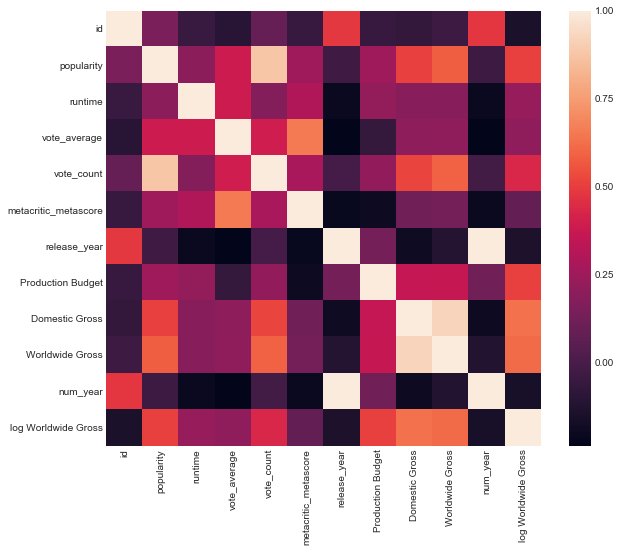

In [39]:
sns.heatmap(critic_revenue_small.corr(), vmax=1, square=True)

In [40]:
#Defining features and target for this dataset based on co-relation
features = ['metacritic_metascore']
target = ['Worldwide Gross']

In [41]:
#splitting data set into training and test data set in 0.7/0.3
train, test = train_test_split(critic_revenue_small,test_size=0.30)
train.head()

,genres,id,original_language,original_title,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,...,vote_average,vote_count,metacritic_metascore,release_year,Release Date,Production Budget,Domestic Gross,Worldwide Gross,num_year,log Worldwide Gross
1092,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",2142,en,Cop Land,0.366987,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1997-08-15,0.105609,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",...,6.6,0.198085,0.474228,1997,8/15/1997,0.084930,0.759878,0.560543,1997,0.446132
733,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 35, ""name...",19255,en,Away We Go,-0.135432,"[{""name"": ""Neal Street Productions"", ""id"": 152...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-06-05,-0.211219,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",...,6.7,-0.043880,0.158076,2009,6/5/2009,0.594512,-0.165729,-0.183881,2009,-0.372070
822,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",9089,en,Home for the Holidays,-0.470652,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1995-11-02,0.052805,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",...,6.3,-0.231935,0.052692,1995,11/3/1995,0.509582,0.043567,-0.017058,1995,-0.024017
201,"[{""id"": 10749, ""name"": ""Romance""}, {""id"": 35, ...",50544,en,Friends with Benefits,1.533579,"[{""name"": ""Castle Rock Entertainment"", ""id"": 9...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2011-07-21,0.369633,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",...,6.5,2.523708,0.421536,2011,7/22/2011,1.783537,1.044340,1.711780,2011,0.816526
426,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 18, ""name...",6016,en,The Good Thief,-0.539671,"[{""name"": ""Fox Searchlight Pictures"", ""id"": 43...","[{""iso_3166_1"": ""CA"", ""name"": ""Canada""}, {""iso...",2003-04-03,0.316828,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",...,6.0,-0.241965,0.684996,2003,4/2/2003,1.358886,-0.320650,-0.234537,2003,-0.570994


In [42]:
#Fill the training and test data with require information
X_train = train[features].dropna()
y_train = train[target].dropna()
X_test = test[features].dropna()
y_test = test[target].dropna()

In [43]:
from sklearn import linear_model# compute classification accuracy for the linear regression model
from sklearn import metrics # for the check the error and accuracy of the model
lin = linear_model.LinearRegression()
# train the model on the training set
lin.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [44]:
lin_score_train = lin.score(X_test, y_test)
lin_score_test = lin.score(X_train, y_train)

In [45]:
print("Training score: ",lin_score_train)
print("Testing score: ",lin_score_test)

Training score:  -0.0025904693212308594
Testing score:  0.023112236913135353


In [46]:
yPrediction = lin.predict(X_test)


In [47]:
#Calculate root-mean-square error (RMSE):
import numpy as np
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(yPrediction, y_test)
lin_rmse = np.sqrt(lin_mse)
print('Linear Regression RMSE: %.4f' % lin_rmse)

Linear Regression RMSE: 0.9564


In [48]:
#Calculate mean absolute error (MAE):
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(yPrediction, y_test)
print('Liner Regression MAE: %.4f' % lin_mae)

Liner Regression MAE: 0.6575


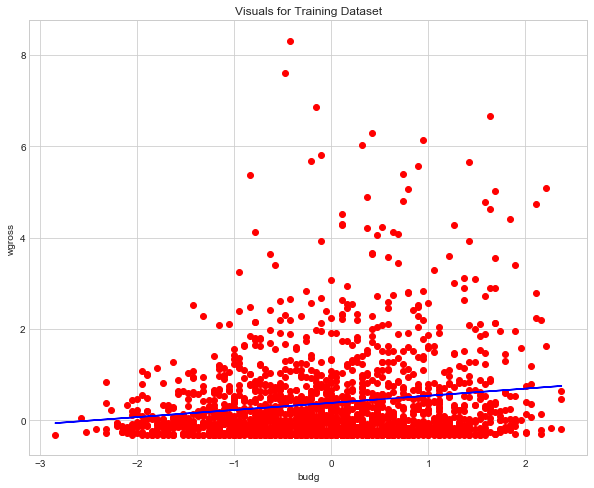

In [49]:
# Visualising the training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, lin.predict(X_train), color = 'blue')
plt.title ("Visuals for Training Dataset")
plt.xlabel("budg")
plt.ylabel("wgross")
plt.show()

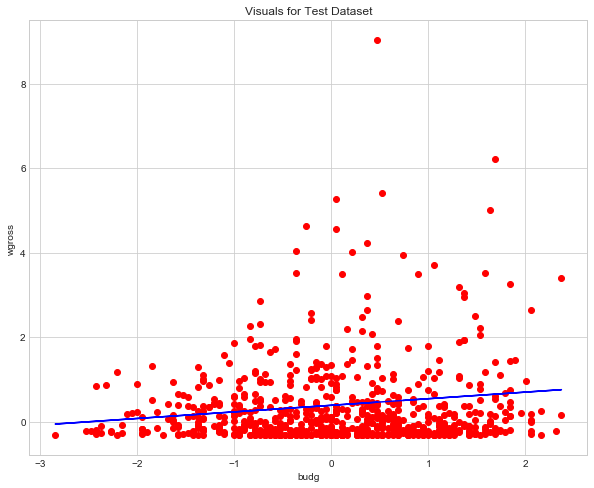

In [50]:
plt.scatter(X_test, y_test , color = 'red')
plt.plot(X_train, lin.predict(X_train), color = 'blue')
plt.title ("Visuals for Test Dataset")
plt.xlabel("budg")
plt.ylabel("wgross")
plt.show()

In [51]:
from sklearn import neighbors
n_neighbors=5
knn=neighbors.KNeighborsRegressor(n_neighbors,weights='uniform')
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [52]:
knn_score_train = knn.score(X_test, y_test)
knn_score_test = knn.score(X_train, y_train)

print("Training score: ",knn_score_train)
print("Testing score: ",knn_score_test)

Training score:  -0.20968995764453188
Testing score:  -0.06683964586631808
